In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as sil

In [208]:
data=pd.read_csv('C:\\Users\\user\\Downloads\\crime_data.csv')

In [209]:
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)

In [210]:
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [211]:
data.shape

(50, 5)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [213]:
data=data.iloc[:,1:]

In [214]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


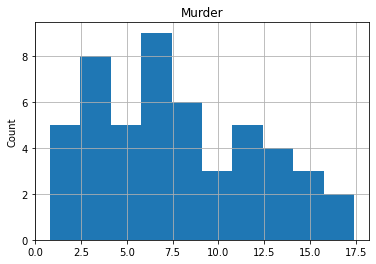

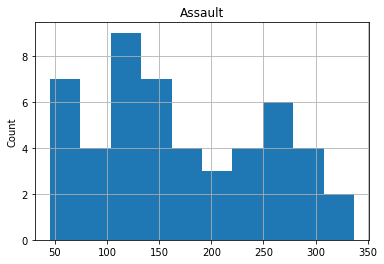

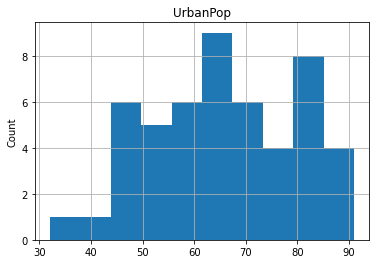

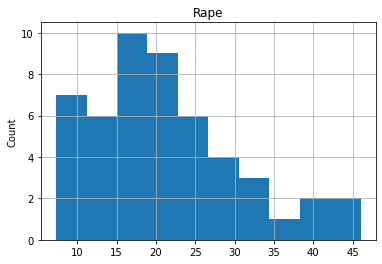

In [215]:
for feature in data.columns:
    data=data.copy()
    data1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

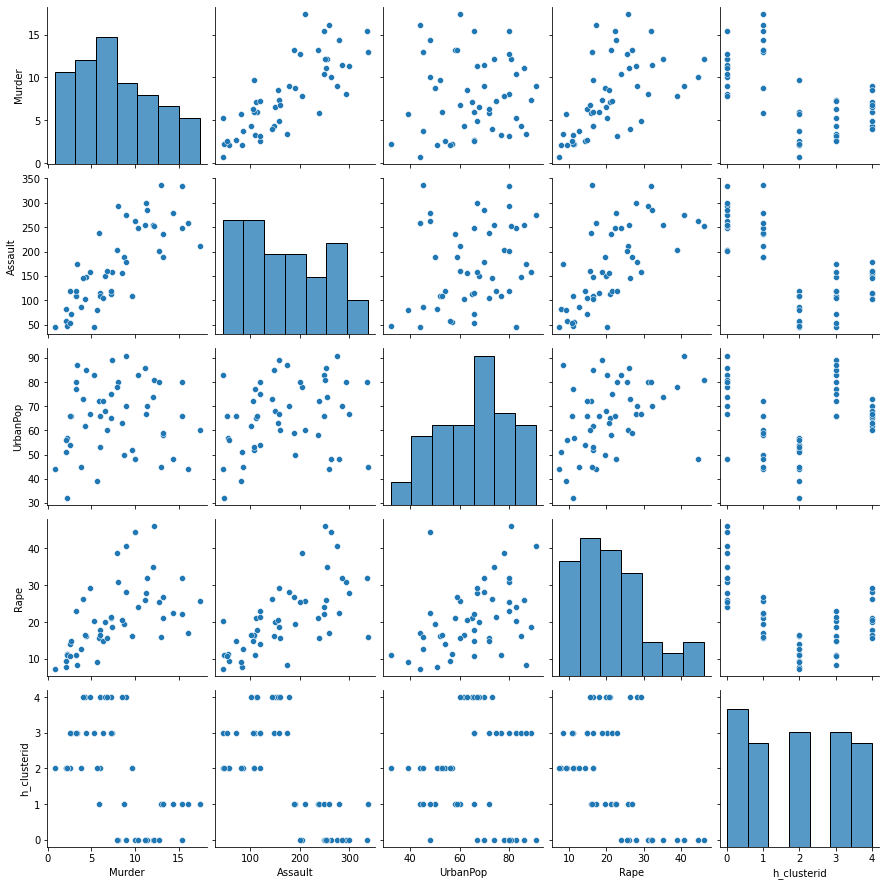

In [78]:
sns.pairplot(data)

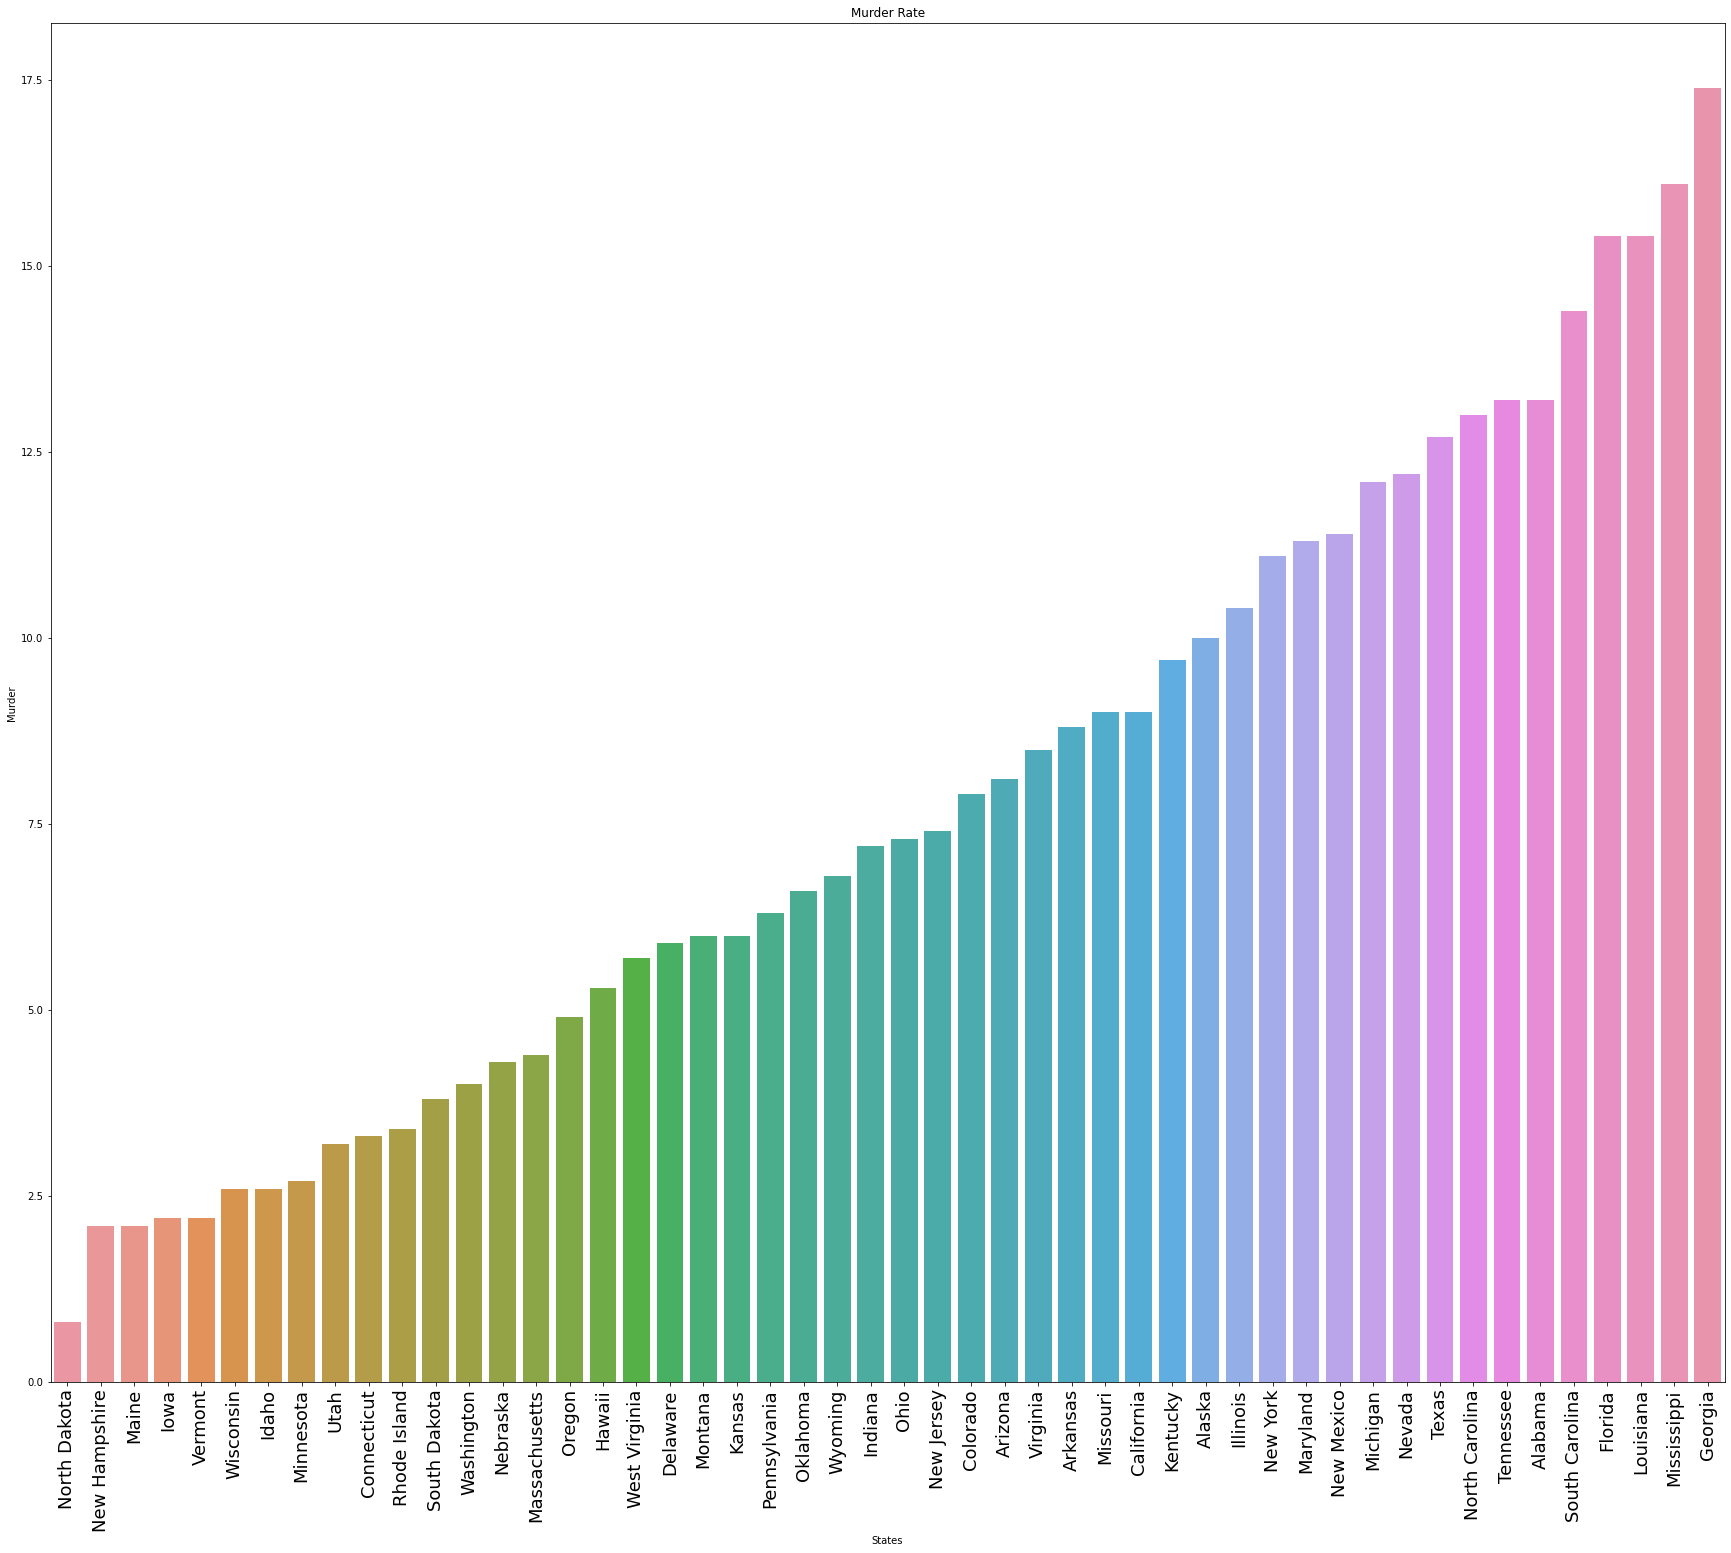

In [104]:
plt.figure(figsize=(30,25))
sns.barplot(x='States',y='Murder',data=data,order=data.sort_values('Murder').States)
plt.title("Murder Rate")
plt.xticks(rotation=90,fontsize=18)
plt.show()

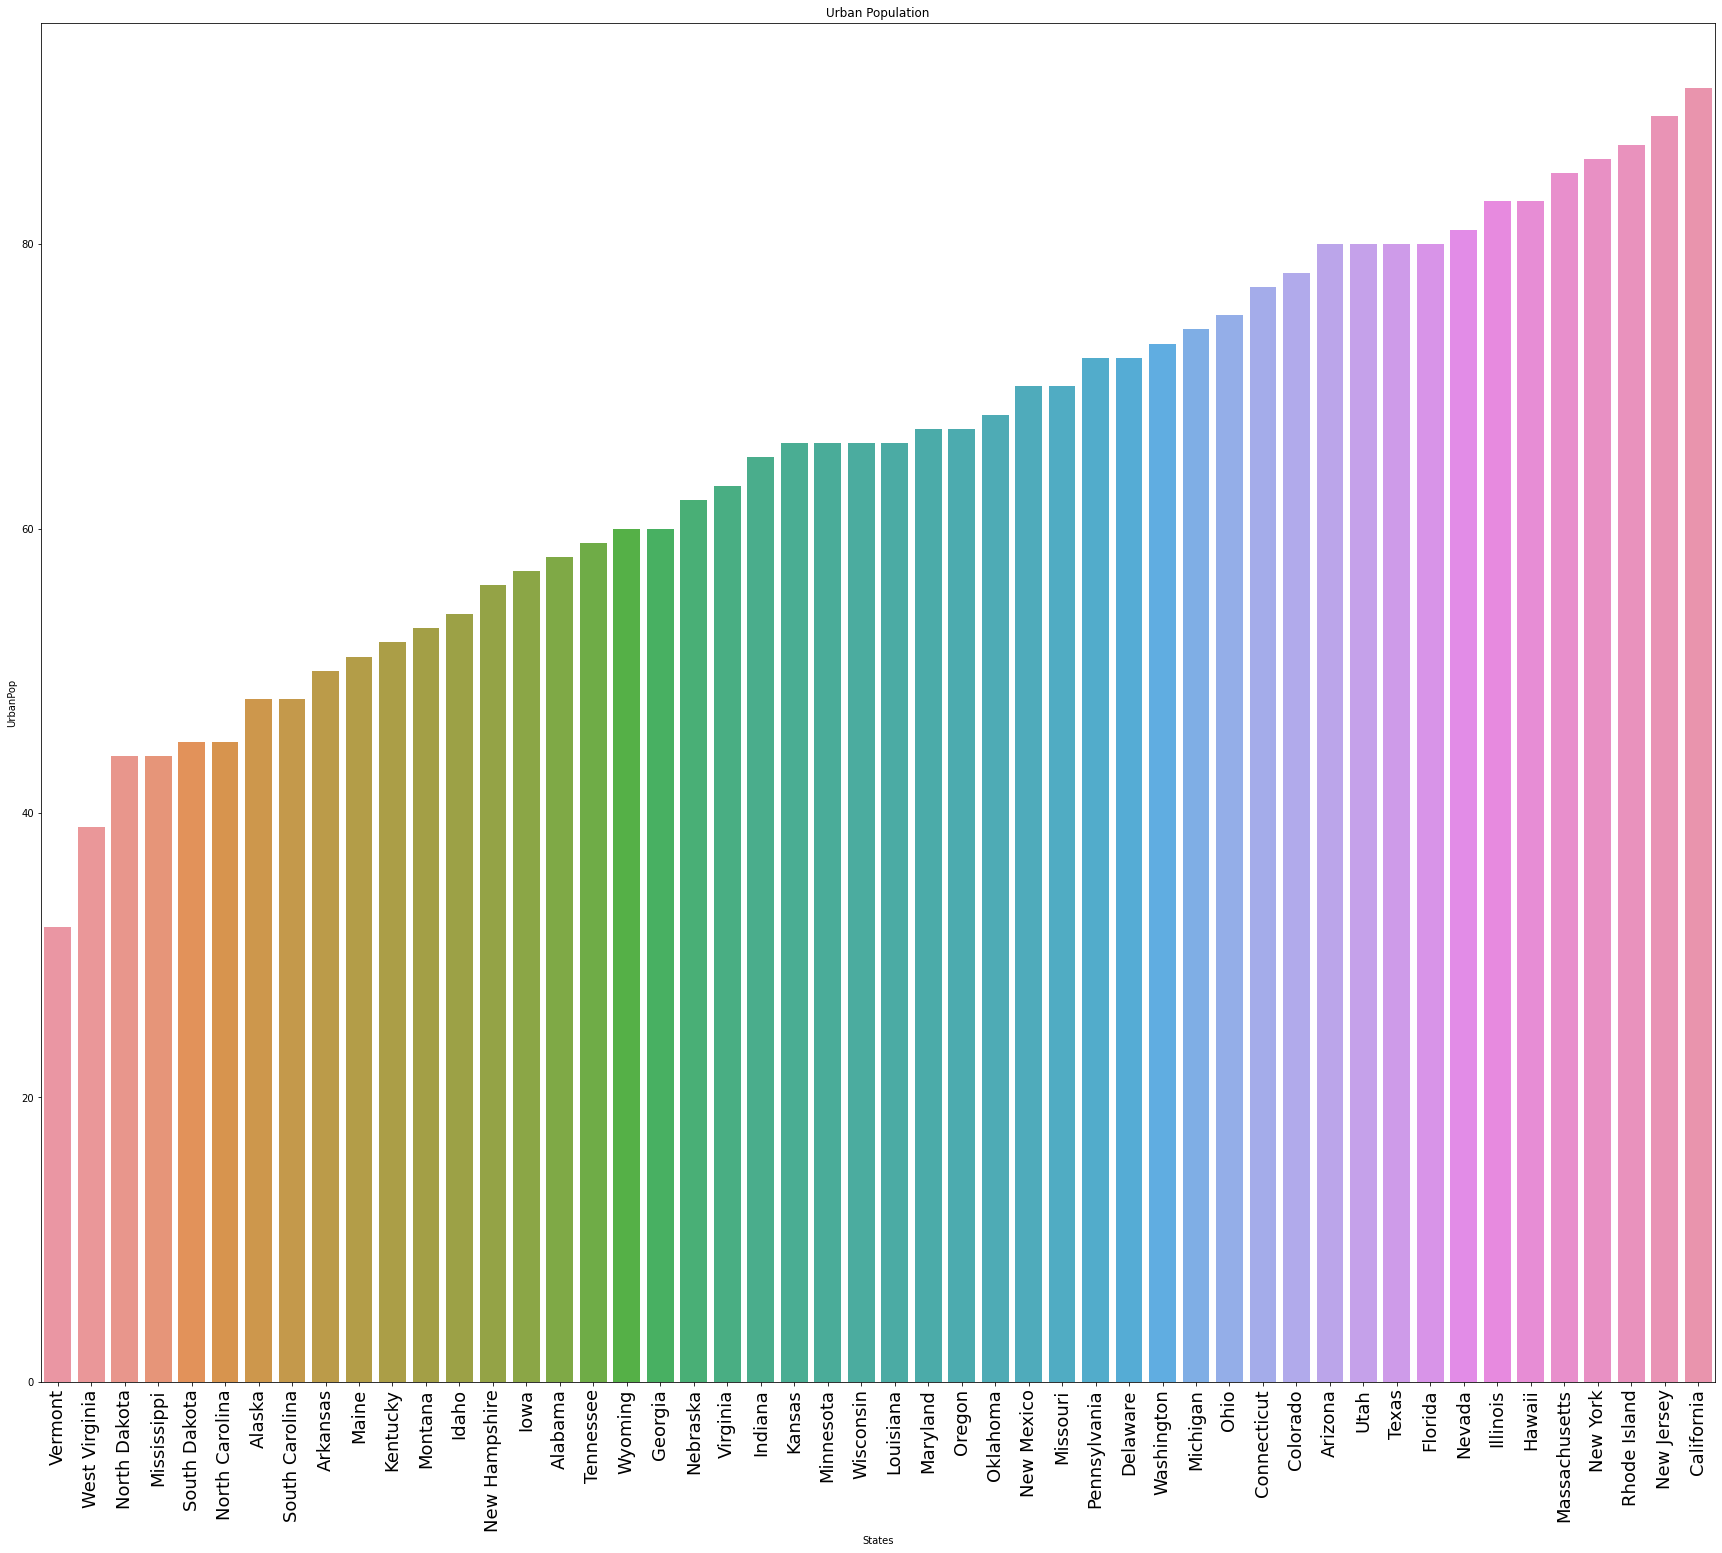

In [105]:
plt.figure(figsize=(30,25))
sns.barplot(x='States',y='UrbanPop',data=data,order=data.sort_values('UrbanPop').States)
plt.title("Urban Population")
plt.xticks(rotation=90,fontsize=18)
plt.show()

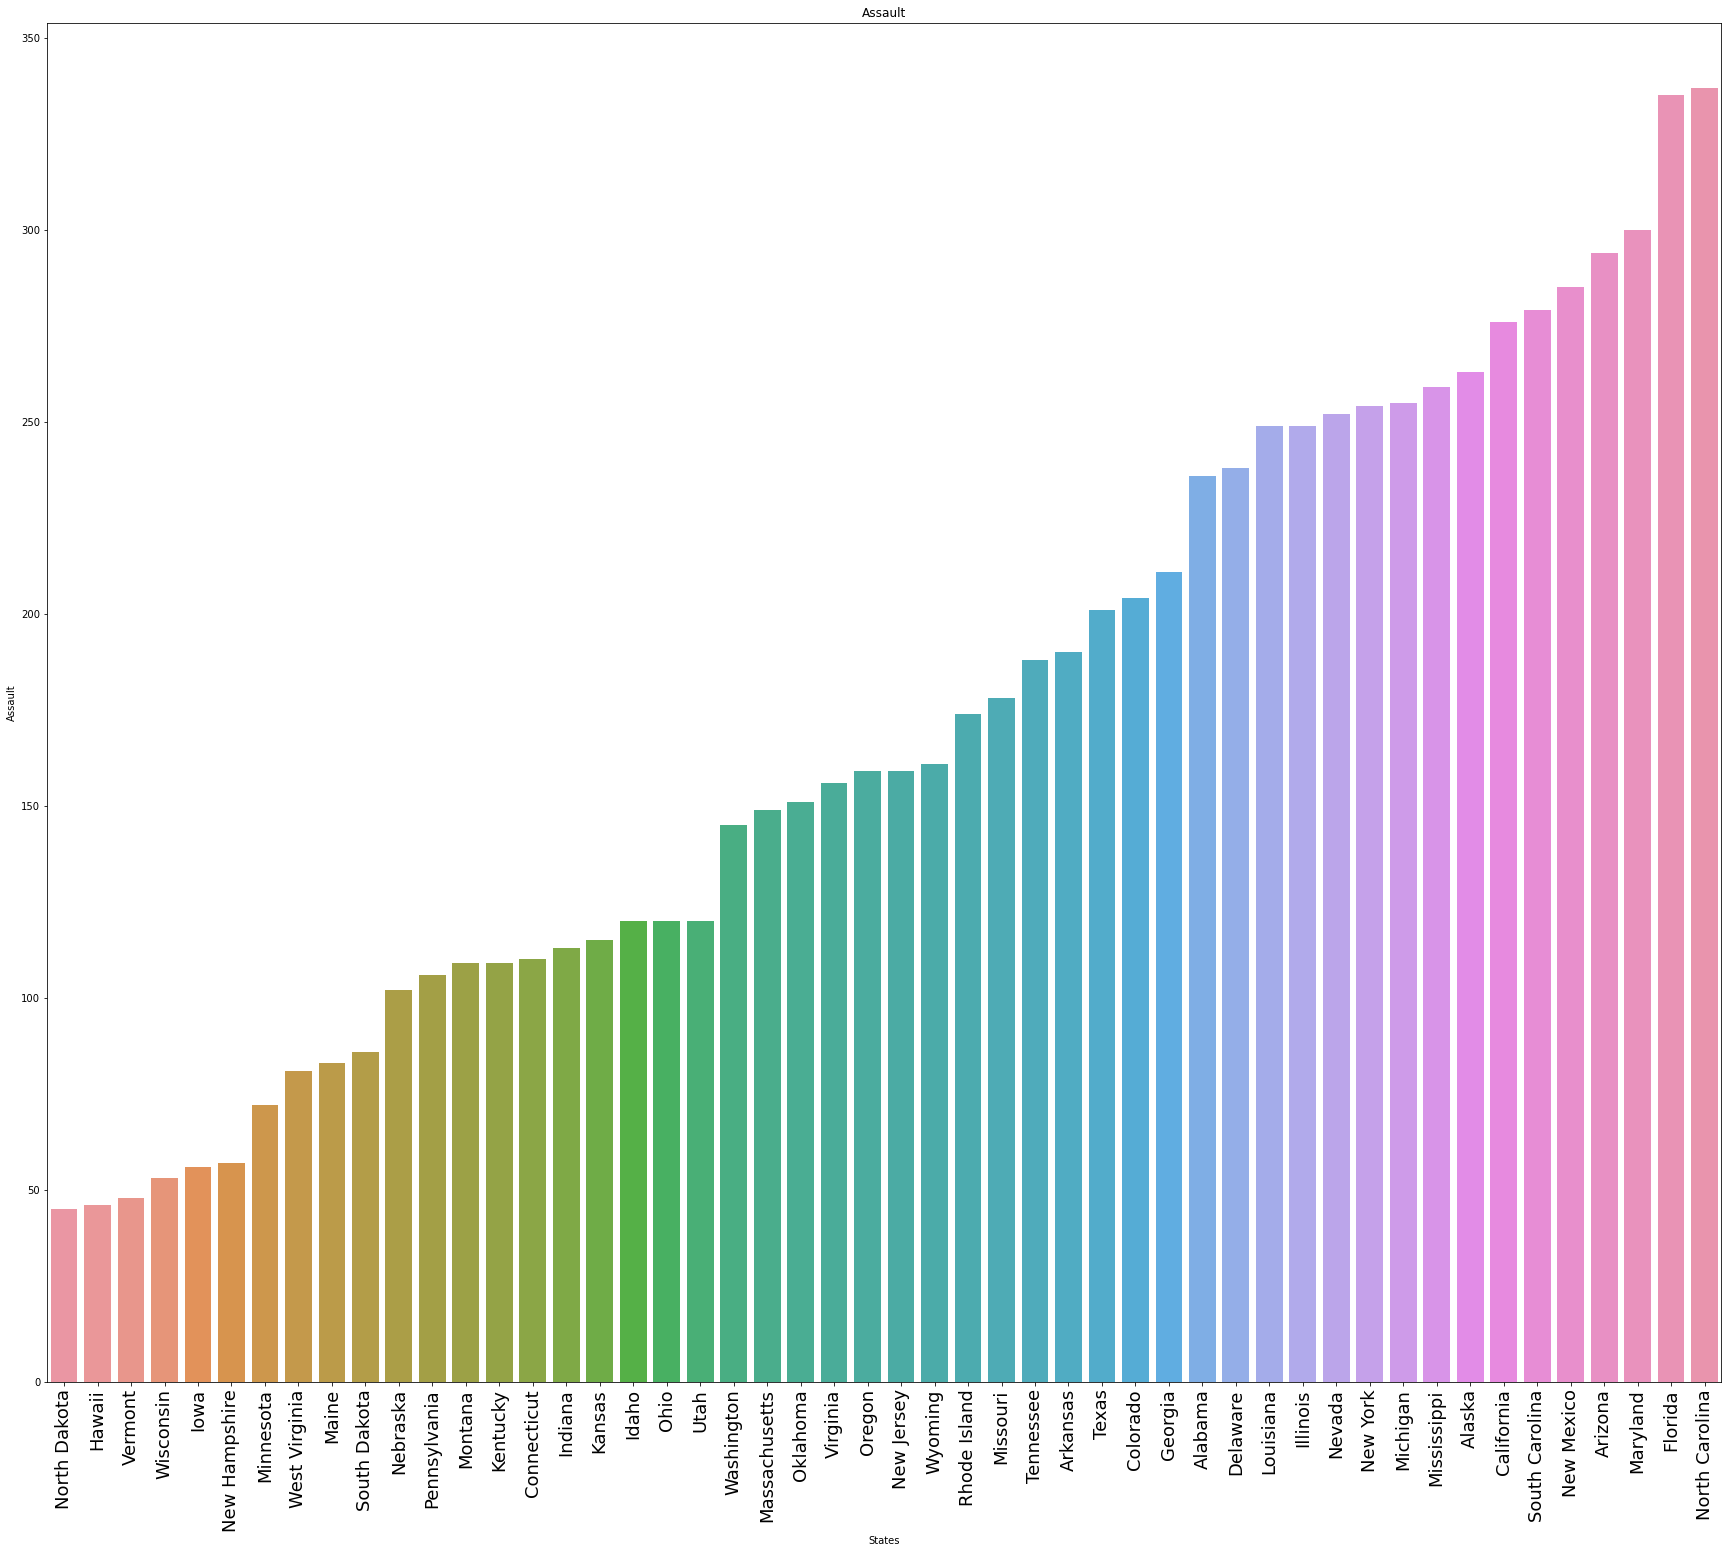

In [106]:
plt.figure(figsize=(30,25))
sns.barplot(x='States',y='Assault',data=data,order=data.sort_values('Assault').States, pallette='')
plt.title("Assault")
plt.xticks(rotation=90,fontsize=18)
plt.show()

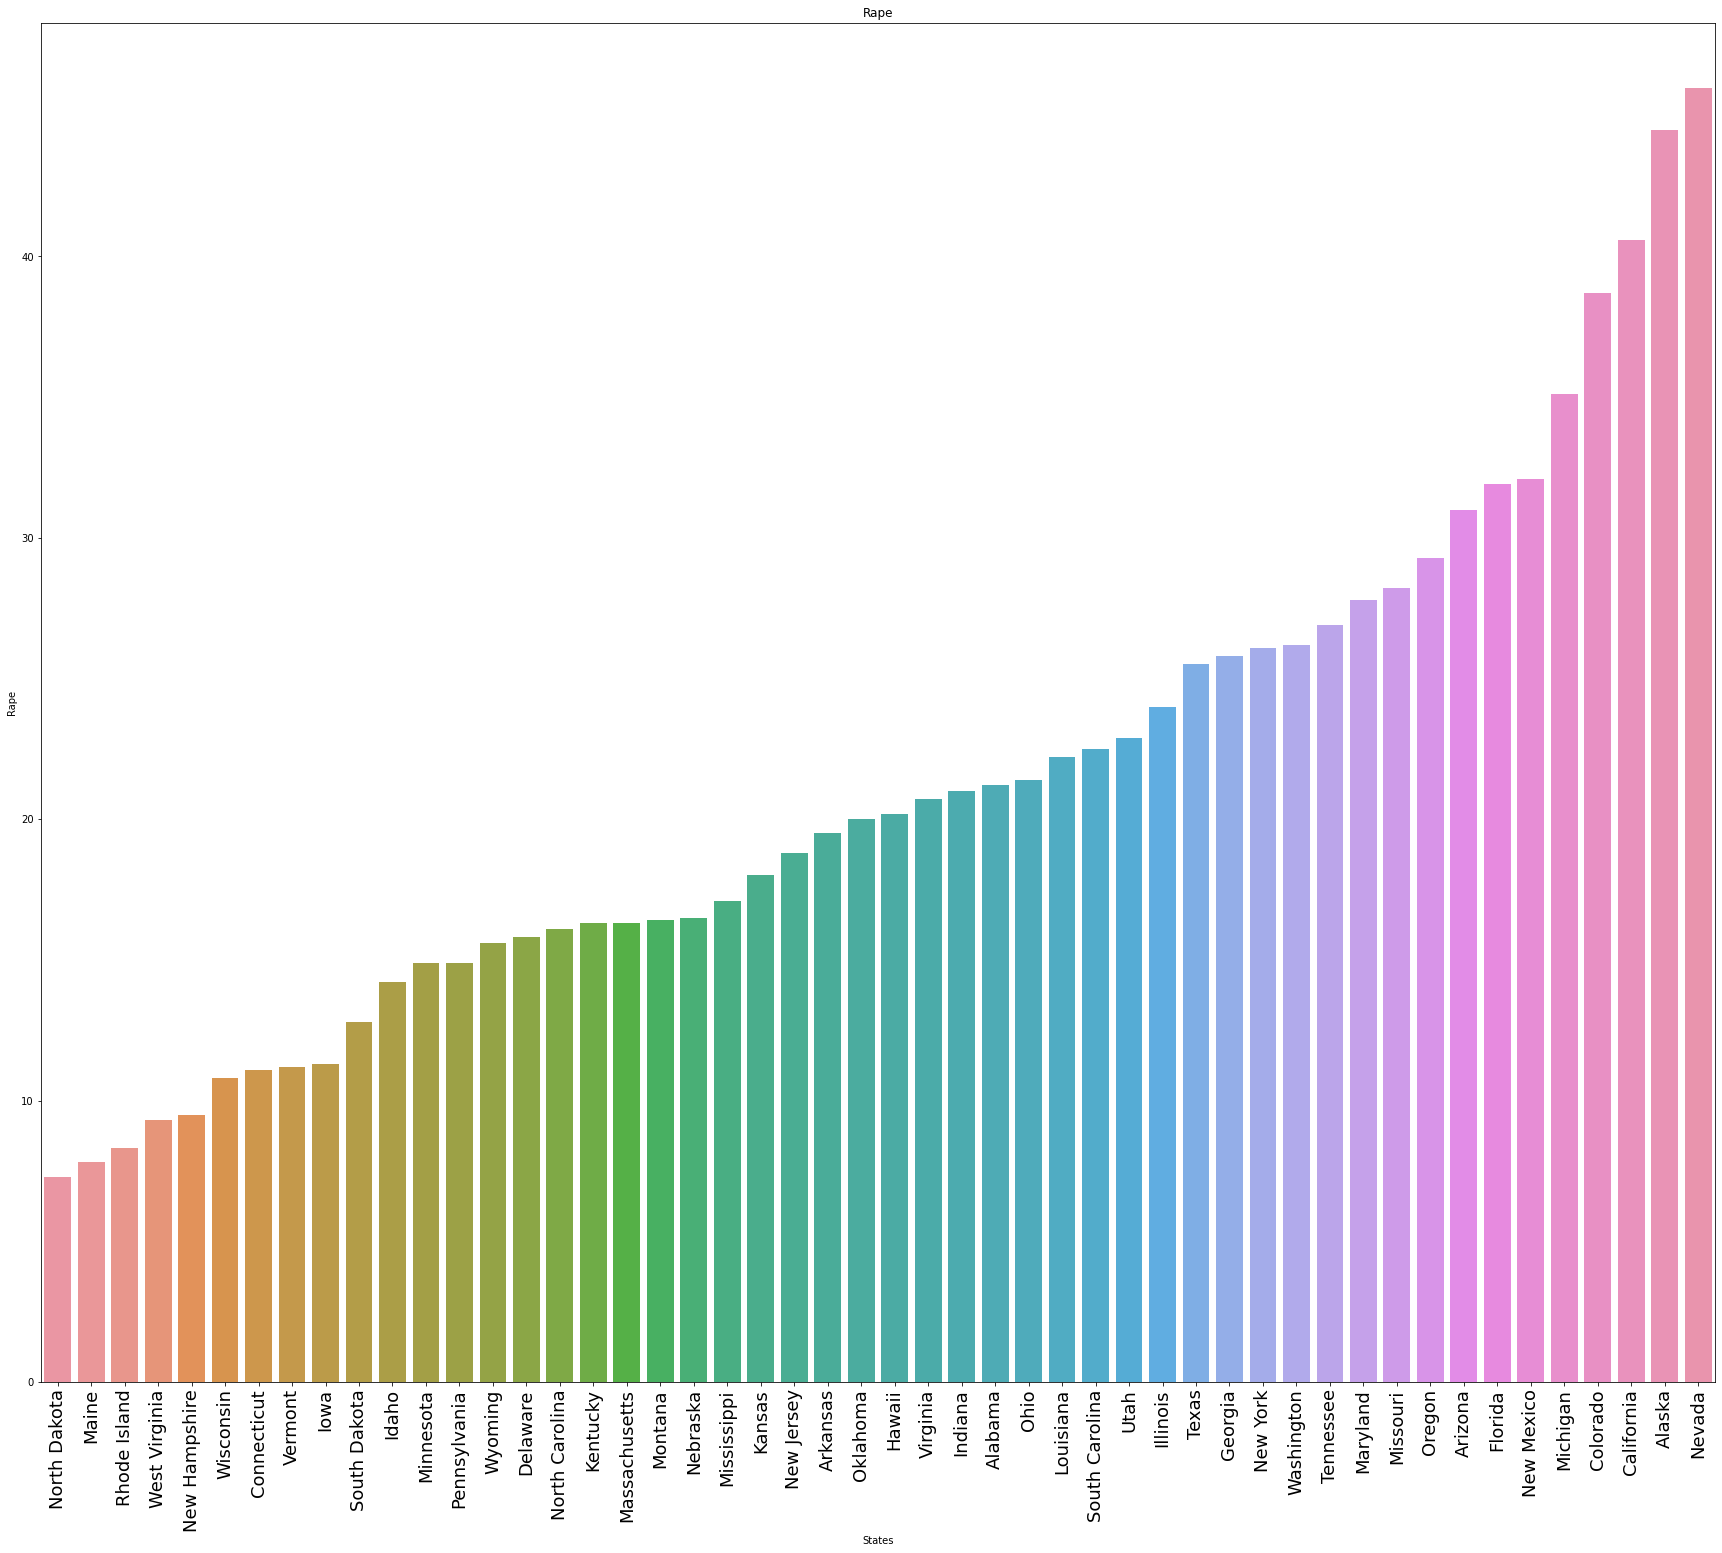

In [107]:
plt.figure(figsize=(30,25))
sns.barplot(x='States',y='Rape',data=data,order=data.sort_values('Rape').States)
plt.title("Rape")
plt.xticks(rotation=90,fontsize=18)
plt.show()

# HIERARCHIAL

In [7]:
#normalization

In [61]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [96]:
df_norm=norm_func(data.iloc[:,1:])

In [97]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


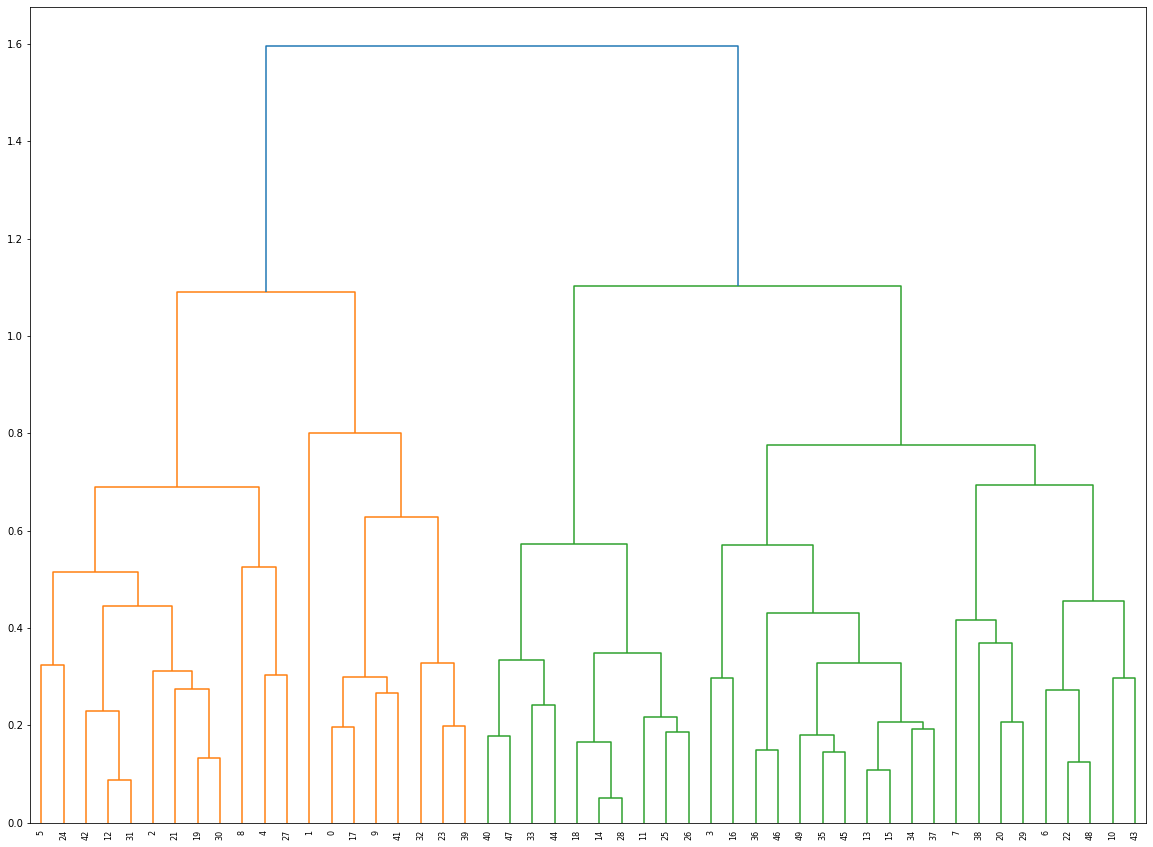

In [98]:
plt.figure(figsize=(20,15))
dendrgram=sch.dendrogram(sch.linkage(df_norm,'complete'))

In [101]:
n_clusters=[2,3,4,5,6]
for n_clusters in n_clusters:
    for linkages in ['ward','complete','average','single']:
        cluster1=AgglomerativeClustering(n_clusters,linkage=linkages)
        labels1=cluster1.fit_predict(df_norm)
        sil_score=sil(df_norm,labels1)
        print(f"for {n_clusters} with {linkages} linkages : {sil_score}")
    print()

for 2 with ward linkages : 0.42364457559625074
for 2 with complete linkages : 0.42364457559625074
for 2 with average linkages : 0.42364457559625074
for 2 with single linkages : 0.21033337025958493

for 3 with ward linkages : 0.3191691542812128
for 3 with complete linkages : 0.30877213909512063
for 3 with average linkages : 0.35149572430421583
for 3 with single linkages : 0.14223288708185458

for 4 with ward linkages : 0.3298707379986785
for 4 with complete linkages : 0.30607294424263076
for 4 with average linkages : 0.3699239114027717
for 4 with single linkages : -0.16741191954744025

for 5 with ward linkages : 0.2829012429325644
for 5 with complete linkages : 0.3056360903608855
for 5 with average linkages : 0.32574781342555276
for 5 with single linkages : -0.18215418215195153

for 6 with ward linkages : 0.2813419859950179
for 6 with complete linkages : 0.27284356597794224
for 6 with average linkages : 0.28150964277696044
for 6 with single linkages : -0.058198610679380175



In [108]:
#maximum number is with 2 clusters 

In [66]:
#creating clusters

In [109]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [110]:
hc

AgglomerativeClustering(affinity='euclidean')

In [111]:
hc.fit_predict(df_norm)

C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [112]:
y_hc=hc.fit_predict(df_norm)

C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [113]:
y=pd.DataFrame(y_hc,columns=['clustersid'])

In [114]:
y['clustersid'].value_counts()

0    30
1    20
Name: clustersid, dtype: int64

In [115]:
data['h_clusterid']=y_hc

In [117]:
data.head()

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [118]:
data.groupby(['h_clusterid'])['Murder'].apply(lambda x : tuple(x))

h_clusterid
0    (8.8, 3.3, 5.9, 5.3, 2.6, 7.2, 2.2, 6.0, 9.7, ...
1    (13.2, 10.0, 8.1, 9.0, 7.9, 15.4, 17.4, 10.4, ...
Name: Murder, dtype: object

In [119]:
data.groupby(['h_clusterid'])['Assault'].apply(lambda x : tuple(x))

h_clusterid
0    (190, 110, 238, 46, 120, 113, 56, 115, 109, 83...
1    (236, 263, 294, 276, 204, 335, 211, 249, 249, ...
Name: Assault, dtype: object

In [121]:
data.groupby(['h_clusterid'])['Rape'].apply(lambda x : tuple(x))

h_clusterid
0    (19.5, 11.1, 15.8, 20.2, 14.2, 21.0, 11.3, 18....
1    (21.2, 44.5, 31.0, 40.6, 38.7, 31.9, 25.8, 24....
Name: Rape, dtype: object

In [122]:
#cluster 0 has less number of murder, assaults, and rapes compared to cluster 1

# K MEANS

In [152]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [123]:
df=pd.read_csv('C:\\Users\\user\\Downloads\\crime_data.csv')

In [124]:
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)

In [125]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [126]:
df.shape

(50, 5)

In [127]:
df_norm=norm_func(df.iloc[:,1:])

In [129]:
dwg=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    dwg.append(kmeans.inertia_)

C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

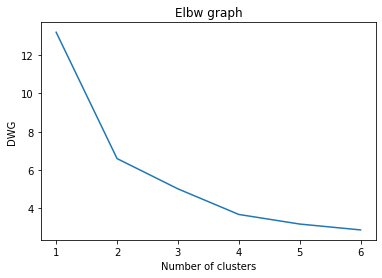

In [130]:
plt.plot(range(1,7),dwg)
plt.title('Elbw graph')
plt.xlabel('Number of clusters')
plt.ylabel('DWG')
plt.show()

In [131]:
#taking number of clusters as 4

In [132]:
model_kmeans=KMeans(n_clusters=4)
model_kmeans.fit(df_norm)

C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [133]:
model_kmeans.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [134]:
md=pd.Series(model_kmeans.labels_)

In [135]:
df['labels']=md

In [136]:
df.head()

,States,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


<Figure size 2160x1296 with 0 Axes>

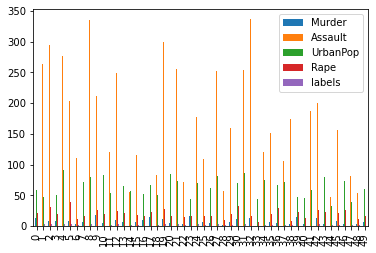

In [142]:
df.plot(kind='bar')
plt.show()

In [141]:
model_kmeans.cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188]])

In [143]:
df.groupby(['labels'])['Murder'].apply(lambda x : tuple(x))

labels
0      (13.2, 8.8, 17.4, 15.4, 16.1, 13.0, 14.4, 13.2)
1    (3.3, 5.9, 5.3, 7.2, 6.0, 4.4, 7.4, 7.3, 6.6, ...
2    (2.6, 2.2, 9.7, 2.1, 2.7, 6.0, 4.3, 2.1, 0.8, ...
3    (10.0, 8.1, 9.0, 7.9, 15.4, 10.4, 11.3, 12.1, ...
Name: Murder, dtype: object

In [144]:
df.groupby(['labels'])['Assault'].apply(lambda x : tuple(x))

labels
0             (236, 190, 211, 249, 259, 337, 279, 188)
1    (110, 238, 46, 113, 115, 149, 159, 120, 151, 1...
2    (120, 56, 109, 83, 72, 109, 102, 57, 45, 86, 4...
3    (263, 294, 276, 204, 335, 249, 300, 255, 178, ...
Name: Assault, dtype: object

In [145]:
df.groupby(['labels'])['Rape'].apply(lambda x : tuple(x))

labels
0     (21.2, 19.5, 25.8, 22.2, 17.1, 16.1, 22.5, 26.9)
1    (11.1, 15.8, 20.2, 21.0, 18.0, 16.3, 18.8, 21....
2    (14.2, 11.3, 16.3, 7.8, 14.9, 16.4, 16.5, 9.5,...
3    (44.5, 31.0, 40.6, 38.7, 31.9, 24.0, 27.8, 35....
Name: Rape, dtype: object

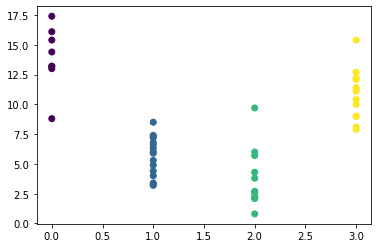

In [156]:
plt.scatter(df['labels'],df['Murder'],c=model_kmeans.labels_)

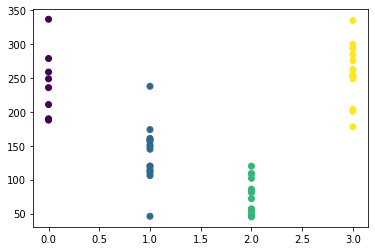

In [157]:
plt.scatter(df['labels'],df['Assault'],c=model_kmeans.labels_)

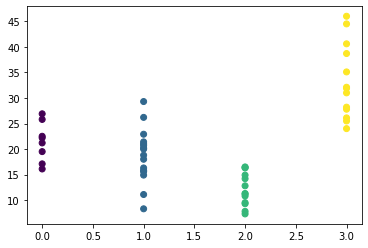

In [158]:
plt.scatter(df['labels'],df['Rape'],c=model_kmeans.labels_)

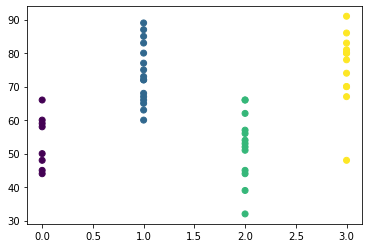

In [207]:
plt.scatter(df['labels'],df['UrbanPop'],c=model_kmeans.labels_)

In [159]:
#cluster 2 is more safer than any other clusters

# DBSCAN

In [162]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [163]:
dataframe=pd.read_csv('C:\\Users\\user\\Downloads\\crime_data.csv')

In [165]:
dataframe.rename({'Unnamed: 0':'states'},axis=1,inplace=True)

In [172]:
dataframe.drop(['states'],axis=1,inplace=True)

In [173]:
dataframe.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [174]:
array=dataframe.values

In [175]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [176]:
stscaler = StandardScaler().fit(array)
x=stscaler.transform(array)

In [177]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [192]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=4)

In [193]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [201]:
dataframe['clusters']=dbscan.labels_

In [202]:
dataframe.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [203]:
dataframe.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


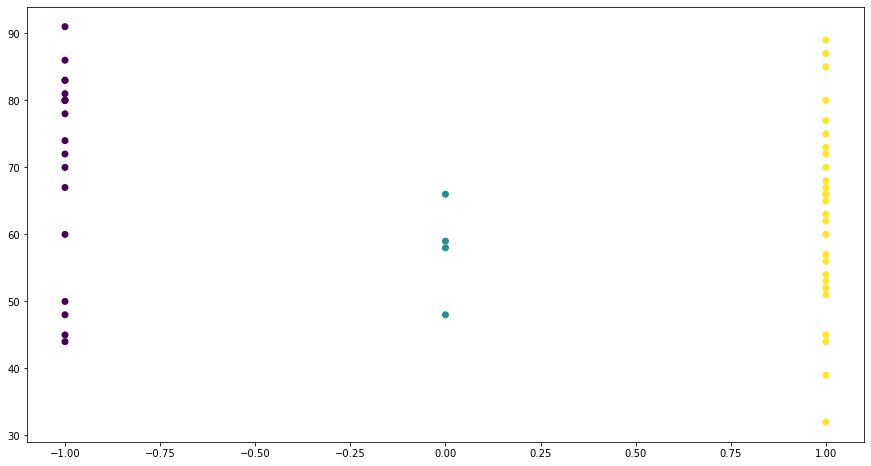

In [206]:
plt.figure(figsize=(15,8))
plt.scatter(dataframe['clusters'],dataframe['UrbanPop'],c=dbscan.labels_)